In [ ]:
# Heart Failure Prediction
# Problem Statement :
# With a plethora of medical data available and the rise of Data Science, a host of startups are taking up the challenge of attempting to create indicators
# for the forseen diseases that might be contracted! Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million 
# lives each year, which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. People with cardiovascular disease or who are 
# at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) 
# need early detection and management wherein a machine learning model can be of great help. In this way, we try to solve automate another problem that occurs in 
# the nature with a view to counter it and focus on to the next problem with the help of AI techniques!

# Aim :
# To classify / predict whether a patient is prone to heart failure depending on multiple attributes.
# It is a binary classification with multiple numerical and categorical features.

# Age : age of the patient [years]
# Sex : sex of the patient [M: Male, F: Female]
# ChestPainType : chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
# RestingBP : resting blood pressure [mm Hg]
# Cholesterol : serum cholesterol [mm/dl]
# FastingBS : fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG : resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR : maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina : exercise-induced angina [Y: Yes, N: No]
# Oldpeak : oldpeak = ST [Numeric value measured in depression]
# ST_Slope : the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
# HeartDisease : output class [1: heart disease, 0: Normal]

In [ ]:
# Chest Pain Type
    # 1. ASY (Asymptomatic) - No chest pain is reported. silent disease
    # 2. NAP (Non-Anginal Pain) - Chest pain is present  , but it's clearly not related to the heart.
    # 3. ATA (Atypical angina) - Chest pain symptoms are present but donot perfectly fit the classic descriptions of heart-related pain
    # 4. Typical ANgina  - Classic , textbook chest pain caused by reduced blood
# ExerciseAngina  -discomfort caused by reduced blood flow to the heart muscle
    # Yes - String predictor of heart
# FastingBS - A value > 120 mg/dl is a indicator of high diabetes or pre-diabeted, which significantly increases heart disease risk

In [2]:
# importing necessary Libarires
import numpy as np
import pandas as pd


In [3]:
data = pd.read_csv('heart.csv')
print('Dataset Shape :',data.shape)
data.head()

Dataset Shape : (918, 12)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
# Checking the balanced or imbalanced dataset
data['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Since the dataset is balanced .

In [5]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [6]:
data['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

In [7]:
data['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [8]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

In [9]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
# checking the missing values in the dataset
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Insights
### Age
- The median average age group of people are nearly 54.
- Around 75 percent of population are age group of 60.
### RestingBp
- The average RestingBP of the people are 132. which include minimum value 0 and maximum 200 which is outlier.
- 75 percent of population are suffering from high RestingBP i.e. 140 mm/Hg.
## Cholestrol
- 75 percent of people are suffering from high cholestrol
## Fasting BS
- most of the people having not suffereing from FastingBS more than 75 percent of population.

In [53]:
#Numerical Columns
num_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
#Categorical Columns
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

In [54]:
num_cols = ['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak']

In [55]:
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [56]:
X = data.drop('HeartDisease',axis=1)
y = data['HeartDisease']

In [57]:
print("Shape",X.shape)


Shape (918, 11)


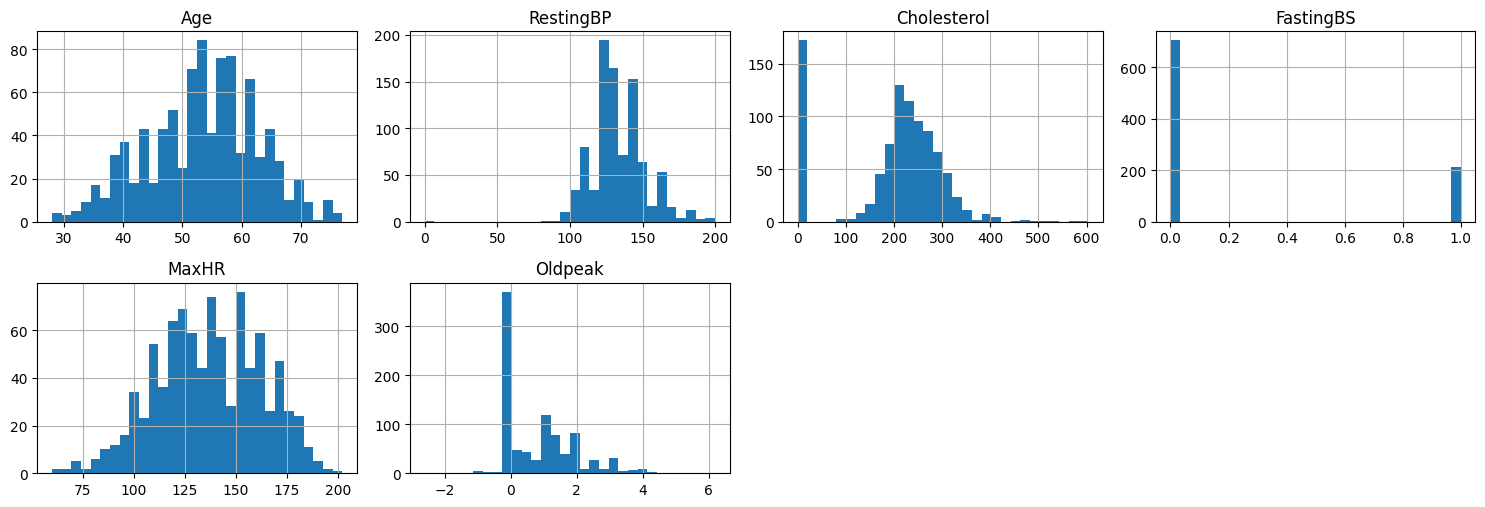

In [58]:
#histogram for the numerical features
import matplotlib.pyplot as plt
X[num_cols].hist(bins=30,figsize=(15,15),layout=(6,4))
plt.tight_layout()
plt.show()

<Axes: >

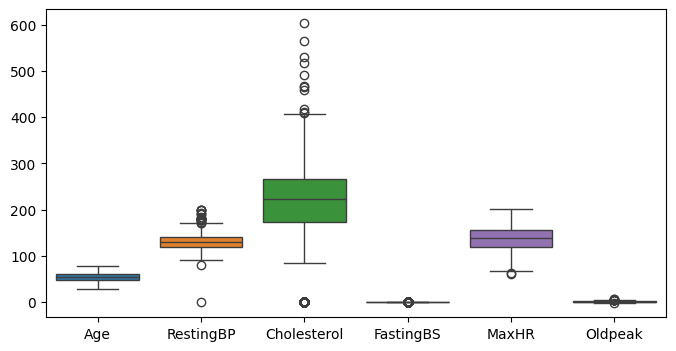

In [66]:
# univariate Analysis for numerival columns
plt.figure(figsize=(8,4))
sns.boxplot(data=data[num_cols])
# plt.title('Boxplot ')

C:\Users\himan\AppData\Local\Temp\ipykernel_22612\705312320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_22612\705312320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_22612\705312320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col].va

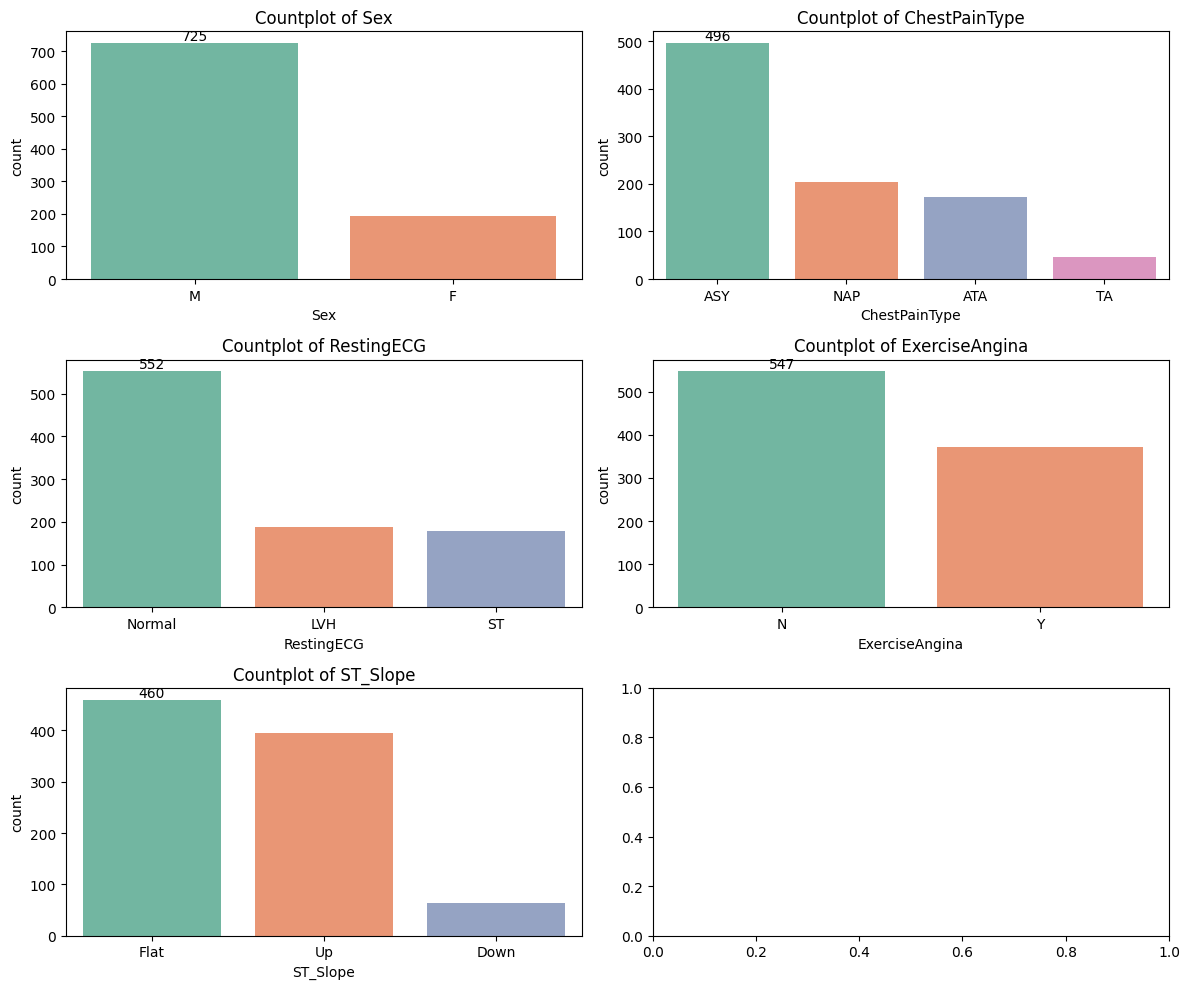

In [59]:
import seaborn as sns
fig , axes = plt.subplots(3,2,figsize=(12,10))
axes = axes.flatten() 
for i , col in enumerate(cat_cols):
    sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette='Set2')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].bar_label(axes[i].containers[0])
plt.tight_layout()
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_22612\3487768001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_22612\3487768001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_22612\3487768001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_22612

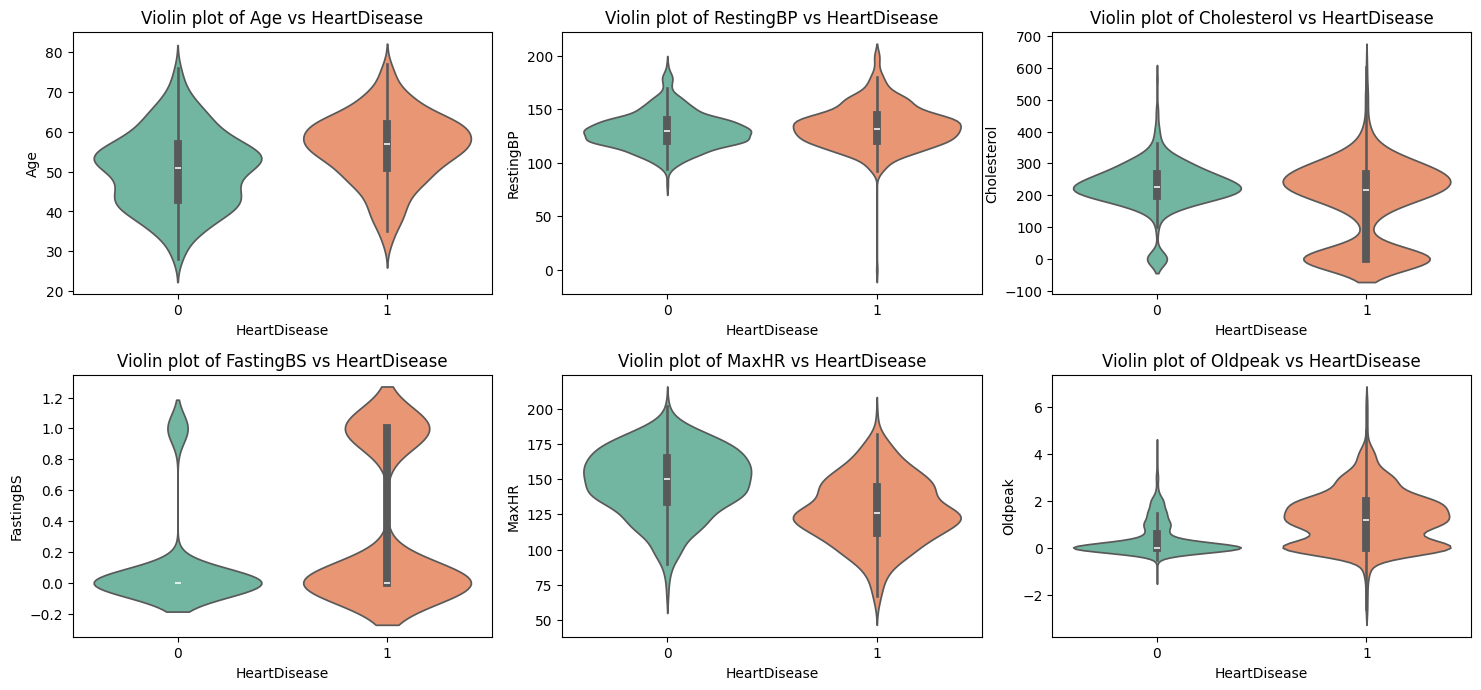

In [62]:
#Bivariate anaylisis for numerical columns
plt.figure(figsize=(15,10))
for i , col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
    plt.title(f'Violin plot of {col} vs HeartDisease')

plt.tight_layout()
plt.show()

In [ ]:
sns.pairplot(data[num_cols + ['HeartDisease']])